In [6]:
import logging
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dotenv import dotenv_values
from generator_drainage_units import run_generator_drainage_units

logging.basicConfig(level=logging.INFO)
pd.set_option("future.no_silent_downcasting", True)

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Define case and base_dir
config = dotenv_values("..\\.env")
base_dir = Path(config["BASE_DIR"])
dir_basisdata = "0_basisdata"
dir_results = "1_resultaat"

# Define case and base_dir
waterschap = 'Waterschap Vallei en Veluwe'
# case_name = "vallei_en_veluwe"
case_name = "Leuvenumse_beek"

# GHG-filename or topographic data to use for drainage units
ghg_file_name = "GHG_2000-2010_L1.NC"
resolution = 10.0

In [9]:
case_path = Path(base_dir, case_name)
max_length = 25000

gdu = run_generator_drainage_units(
    path=case_path,
    dir_basisdata=dir_basisdata,
    dir_results=dir_results,
    waterschap=waterschap,
    ghg_file_name=ghg_file_name,
    read_results=False,
    write_results=True,
    preprocess=True,
    process=True,
    postprocess=True,
    resolution=resolution,
    depth_waterways=0.2,
    buffer_waterways=resolution*2.0,
    smooth_distance=50.0,
    iterations=int(max_length/resolution),
    iteration_group=100,
    flow_method="d8",
)

INFO:root: ### Case "Leuvenumse_beek" ###
INFO:root:     - dir basisdata    = c:\Users\NLHARN\Sweco AB\51024754_Vallei_en_Veluwe_Afwateringseenheden - General\Analyse\3_analyses\Leuvenumse_beek\0_basisdata
INFO:root:     - dir results      = c:\Users\NLHARN\Sweco AB\51024754_Vallei_en_Veluwe_Afwateringseenheden - General\Analyse\3_analyses\Leuvenumse_beek\1_resultaat
INFO:root:   x read basisdata
INFO:root:     - get dataset HYDROOBJECTEN
INFO:root:     - get dataset OUTFLOW_NODES
INFO:root:     - get dataset OVERIGE_WATERGANGEN
INFO:root:     - get dataset HYDROOBJECTEN_PROCESSED_0
INFO:root: * dataset overige_watergangen_processed_4 is missing - check if absolutely required
INFO:root:     - get dataset POTENTIAL_CULVERTS_5
INFO:root:     - get dataset EDGES
INFO:root:     - get dataset NODES
INFO:root:   x read topographical data as input
INFO:root:   x preprocessing GHG data
INFO:root:     - resampling data to new resolution
INFO:root:     - fill holes
INFO:root:     - select waterw

TypeError: 'NoneType' object is not subscriptable

INFO:root:   x creating map layers
INFO:root:     - hydroobjecten
INFO:root:     - edges - order_no
INFO:root:     - edges - no order_no
INFO:root:     - edges - order_no (labels)
INFO:root:     - edges - order_code (labels)
INFO:root:     - rws_water: outflow nodes
INFO:root:     - other waterways - without culverts
INFO:root:     - other waterways - potential culverts (5)
INFO:root:     - raster topography or groundwaterlevel
INFO:root:     - raster topography or groundwaterlevel (processed)
INFO:root:     - raster topography or groundwaterlevel (adapted)
INFO:root:     - drainage units (raster, level 0)
INFO:root:     - drainage units (raster, level 1)
INFO:root:     - drainage units (raster, level 2)
INFO:root:     - drainage units (raster, level 3)
INFO:root:     - split nodes
INFO:root:   x html file saved: Noordtest_drainage_units.html



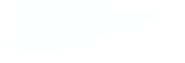
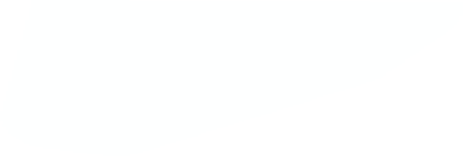
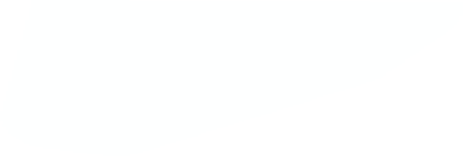
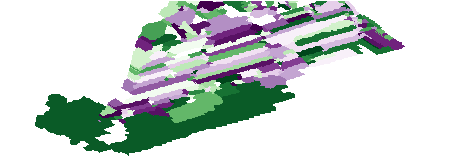
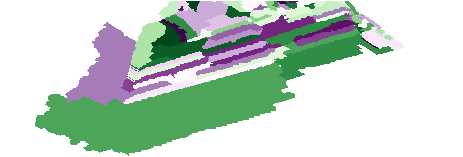
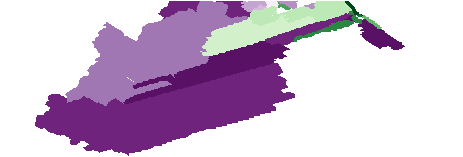
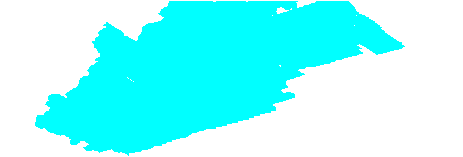

In [ ]:
gdu.generate_folium_map(
    order_labels=True,
    drainage_units_cmap="PRGn",
    drainage_units_opacity=1.0,
    zmin=3.0,
    zmax=30.0,
    dx=0.0,
    dy=-13.0,
    open_html=True
)